# Introduction to python
-- [SICSS Zürich 2021](https://github.com/computational-social-science-zurich/sicss-zurich) --

In [1]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None
#from IPython.core.display import HTML; HTML(open("custom.html", "r").read())

This notebook assumes that you have python3 and jupyter-notebook running on your computer. 

## Working with jupyter-notebook

In [2]:
# This cell contains python code 
# or other programming language: it depends on the kernel you choose
# you can install python, R, julia, stata kernels... 
print("hello world")

hello world


This cell contains text written in Markdown. Markdown is a lightweight markup language with plain text formatting syntax. See for example this [cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) for the most common syntax.

Notebooks are handy for presenting the code and the outcome at the same time, which is useful for comunication (teaching, homeworks, research).

## Python basics

Credit: 2019 ETH Zurich, SIS ID

If you start from 0, it make sense to go through an introduction to get a sense (i.e. not to master, just to learn the existence) of some core concepts: 
- Data types:
    - strings 
    - numerical values
- Structures
    - lists
    - dictionaries
- Operators
- Conditionning:
    - `if` instructions
- Loops: 
    - `for` loops
- Functions

<span style='color:green'>    
**We do not assume that you are fluent in this concepts, but the idea is just that you have seen what it looks like so as to be able to look for help on the internet.**

<span style='color:green'>  $\rightarrow$ 
**Just have a look, for example using this [online book](https://egallic.fr/Enseignement/Python/en/opening-remarks.html), at these concepts**
</span>

<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;Don't forget that
    <ul>
        <li> Indexing in Python starts with <code>0</code>
        </li>
        <li> Upper limits are exclusive
            </li>
        <li> Negative indices start from the right end, <code>-1</code> is the last element, <code>-2</code> the one before, etc.</li>
        <li> <code>:</code> refers to all elements.</li>
    </ul>
</div>


## pandas

`pandas` allows handling tabular data as so called `DataFrame`. Tabular data means that columns have types. Within a colum values are of the same type, but types can differ between columns.

<div class="alert alert-block alert-warning">
    <i class="fa fa-warning"></i>&nbsp;This script introduces <code>numpy</code>, <code>pandas</code> and <code>matplotlib</code> and <code>seaborn</code>. 


Thus it is not a comprehensive introduction to these libraries !
</div>

In [3]:
import pandas as pd

### Some basics

In [4]:
# read file with pandas
df = pd.read_csv('https://raw.githubusercontent.com/ellliottt/robot_judge_2019/master/notebooks/death-penalty-cases.csv')
print(df)

          court_id  author_id state  year             dateFiled  citeCount  \
0               nj        NaN    NJ  1965  1965-09-14T00:00:00Z          8   
1              fla     4019.0    FL  1973  1973-07-26T00:00:00Z        552   
2       texcrimapp     5765.0    TX  1975  1975-04-16T00:00:00Z        143   
3               nm        NaN    NM  2009  2009-11-30T00:00:00Z          0   
4       texcrimapp     5758.0    TX  1944  1944-12-20T00:00:00Z         56   
...            ...        ...   ...   ...                   ...        ...   
32562    ohioctapp     8055.0    OH  2017  2017-07-20T00:00:00Z          0   
32563          cal        NaN    CA  2017  2017-07-20T00:00:00Z          0   
32564          neb        NaN    NE  2017  2017-07-21T00:00:00Z          0   
32565         ohio     5374.0    OH  2017  2017-07-25T00:00:00Z          0   
32566  tenncrimapp     8291.0    TN  2017  2017-07-20T00:00:00Z          0   

                                                 snippet  
0   

<div class="alert alert-block alert-info">
<i class="fa fa-warning"></i>&nbsp;<code>pandas</code> also 
supports reading and writing of other file formats, like <code>.xlsx</code>, <code>.hdf5</code> or <code>sqlite3</code> files.
</div>

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 7 columns):
court_id     32567 non-null object
author_id    18215 non-null float64
state        32567 non-null object
year         32567 non-null int64
dateFiled    32567 non-null object
citeCount    32567 non-null int64
snippet      32567 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 1.7+ MB


The colums have different types `float64` and `object` (other possible type: `int64`). `object` can be read as "anything but a number".

In [37]:
# number of rows and columns
print(df.shape)

(32567, 7)


The `.shape` is numbers of rows times number of columns.

To show the first 5 rows of a data frame we can use `.head()` (`.tail` for the last 5 rows).

In [38]:
print(df.head())

     court_id  author_id state  year             dateFiled  citeCount  \
0          nj        NaN    NJ  1965  1965-09-14T00:00:00Z          8   
1         fla     4019.0    FL  1973  1973-07-26T00:00:00Z        552   
2  texcrimapp     5765.0    TX  1975  1975-04-16T00:00:00Z        143   
3          nm        NaN    NM  2009  2009-11-30T00:00:00Z          0   
4  texcrimapp     5758.0    TX  1944  1944-12-20T00:00:00Z         56   

                                             snippet  
0  N.J.   ( )\n  A. d  \nIN RE WAIVER OF DEATH PE...  
1  whether the death penalty is, per se, unconsti...  
2  # ;s contention that the assessment of the dea...  
3  . d   ( )\n -NMSC- \nIN THE MATTER OF DEATH PE...  
4  assume the district attorney orally waived the...  


Compute some statistics on the columns

In [39]:
print(df.describe())

          author_id          year     citeCount
count  18215.000000  32567.000000  32567.000000
mean    4476.464892   1992.923634     27.181196
std     1955.496462     20.631517     83.771808
min       48.000000   1862.000000      0.000000
25%     3627.000000   1985.000000      0.000000
50%     4339.000000   1998.000000      8.000000
75%     5751.000000   2007.000000     26.000000
max     8517.000000   2017.000000   5330.000000


Print columns' names

In [45]:
print(df.columns)

Index(['court_id', 'author_id', 'state', 'year', 'dateFiled', 'citeCount',
       'snippet'],
      dtype='object')


###  Accessing parts of a data frame

We can access separate columns using a column name:

In [44]:
print(df["year"])

0        1965
1        1973
2        1975
3        2009
4        1944
         ... 
32562    2017
32563    2017
32564    2017
32565    2017
32566    2017
Name: year, Length: 32567, dtype: int64


Single columns are `Series` in `pandas`:

In [46]:
print(type(df['year']))

<class 'pandas.core.series.Series'>


In [47]:
temp = df["year"] + 2 * df["citeCount"]
print(temp)

0        1981
1        3077
2        2261
3        2009
4        2056
         ... 
32562    2017
32563    2017
32564    2017
32565    2017
32566    2017
Length: 32567, dtype: int64


`df.iloc[row_slice, col_slice]` offers index based access:

In [48]:
print(df.iloc[:, 0])

0                 nj
1                fla
2         texcrimapp
3                 nm
4         texcrimapp
            ...     
32562      ohioctapp
32563            cal
32564            neb
32565           ohio
32566    tenncrimapp
Name: court_id, Length: 32567, dtype: object


To extract rows `1` to `2` (included), and all columns up to the last one:

In [49]:
print(df.iloc[1:3, :-1])

     court_id  author_id state  year             dateFiled  citeCount
1         fla     4019.0    FL  1973  1973-07-26T00:00:00Z        552
2  texcrimapp     5765.0    TX  1975  1975-04-16T00:00:00Z        143


To extract the last column:

In [50]:
print(df.iloc[1:3, -1])

1    whether the death penalty is, per se, unconsti...
2    # ;s contention that the assessment of the dea...
Name: snippet, dtype: object


### Filtering a data frame

In [52]:
# all rows where the value of a is smaller than 10:
print(df[df["year"] < 1945])

         court_id  author_id state  year             dateFiled  citeCount  \
4      texcrimapp     5758.0    TX  1944  1944-12-20T00:00:00Z         56   
36             ny     5268.0    NY  1865  1865-03-05T00:00:00Z          6   
43             ny        NaN    NY  1862  1862-12-05T00:00:00Z         10   
59             ny        NaN    NY  1864  1864-03-05T00:00:00Z          6   
61            cal     3861.0    CA  1929  1929-10-22T00:00:00Z        173   
...           ...        ...   ...   ...                   ...        ...   
30907         cal     3814.0    CA  1909  1909-05-19T00:00:00Z        102   
31261          md     4703.0    MD  1925  1925-04-09T00:00:00Z         53   
31362          vt     5906.0    VT  1932  1932-05-04T00:00:00Z         59   
31926  texcrimapp     5749.0    TX  1897  1897-05-19T00:00:00Z         17   
32314  texcrimapp        NaN    TX  1911  1911-06-23T00:00:00Z         57   

                                                 snippet  
4      assume th

In [54]:
print(df[df["year"] == 1900])

         court_id  author_id state  year             dateFiled  citeCount  \
115           cal     3808.0    CA  1900  1900-03-16T00:00:00Z         51   
348          okla        NaN    OK  1900  1900-03-23T00:00:00Z         40   
13381  texcrimapp     5749.0    TX  1900  1900-06-13T00:00:00Z          2   

                                                 snippet  
115    been convicted of the crime of murder, and the...  
348    inflicting the death penalty, which would prec...  
13381  the first degree was obtained inflicting the d...  


### Extending a dataframe

Adding a new, computed column:

In [55]:
# values in new column d will be values from "a" squared:
df["year2"] = df["year"] ** 2

print(df.head())

     court_id  author_id state  year             dateFiled  citeCount  \
0          nj        NaN    NJ  1965  1965-09-14T00:00:00Z          8   
1         fla     4019.0    FL  1973  1973-07-26T00:00:00Z        552   
2  texcrimapp     5765.0    TX  1975  1975-04-16T00:00:00Z        143   
3          nm        NaN    NM  2009  2009-11-30T00:00:00Z          0   
4  texcrimapp     5758.0    TX  1944  1944-12-20T00:00:00Z         56   

                                             snippet    year2  
0  N.J.   ( )\n  A. d  \nIN RE WAIVER OF DEATH PE...  3861225  
1  whether the death penalty is, per se, unconsti...  3892729  
2  # ;s contention that the assessment of the dea...  3900625  
3  . d   ( )\n -NMSC- \nIN THE MATTER OF DEATH PE...  4036081  
4  assume the district attorney orally waived the...  3779136  


We can also overwrite a column, here we use `apply` to apply the same function on all values in the given column:

In [56]:
def increment(v):
    return v + 1

df["year_inc"] = df["year"].apply(increment)

print(df.head())

     court_id  author_id state  year             dateFiled  citeCount  \
0          nj        NaN    NJ  1965  1965-09-14T00:00:00Z          8   
1         fla     4019.0    FL  1973  1973-07-26T00:00:00Z        552   
2  texcrimapp     5765.0    TX  1975  1975-04-16T00:00:00Z        143   
3          nm        NaN    NM  2009  2009-11-30T00:00:00Z          0   
4  texcrimapp     5758.0    TX  1944  1944-12-20T00:00:00Z         56   

                                             snippet    year2  year_inc  
0  N.J.   ( )\n  A. d  \nIN RE WAIVER OF DEATH PE...  3861225      1966  
1  whether the death penalty is, per se, unconsti...  3892729      1974  
2  # ;s contention that the assessment of the dea...  3900625      1976  
3  . d   ( )\n -NMSC- \nIN THE MATTER OF DEATH PE...  4036081      2010  
4  assume the district attorney orally waived the...  3779136      1945  


## About plotting

We use `matplotlib` and also `seaborn` in the script. `seaboarn` is a layer ontop of `matplotlib` offering some easy-to-use standard plots and also a more modern layout and styling.

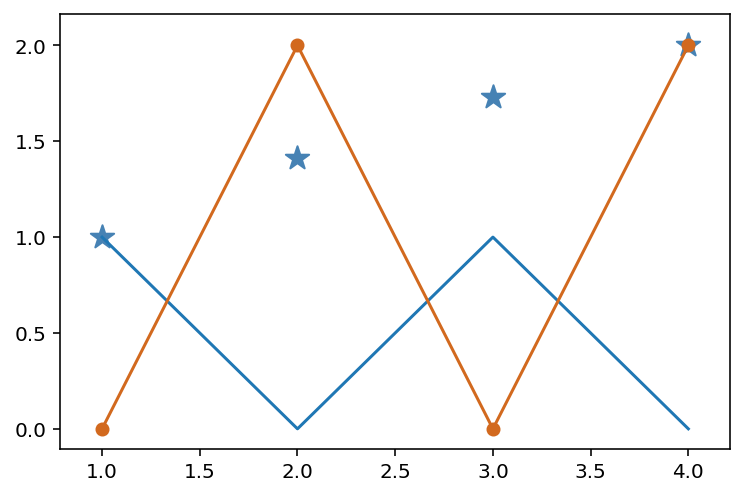

In [57]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 4, 4)
y0 = np.mod(x, 2)
y1 = 2 * (1 - y0)
y2 = np.sqrt(x)

plt.plot(x, y0)  # default color is blue
plt.plot(x, y1, color="chocolate", marker="o")

# no lines, marker size is 150:
plt.scatter(x, y2, color="steelblue", marker="*", s=150);

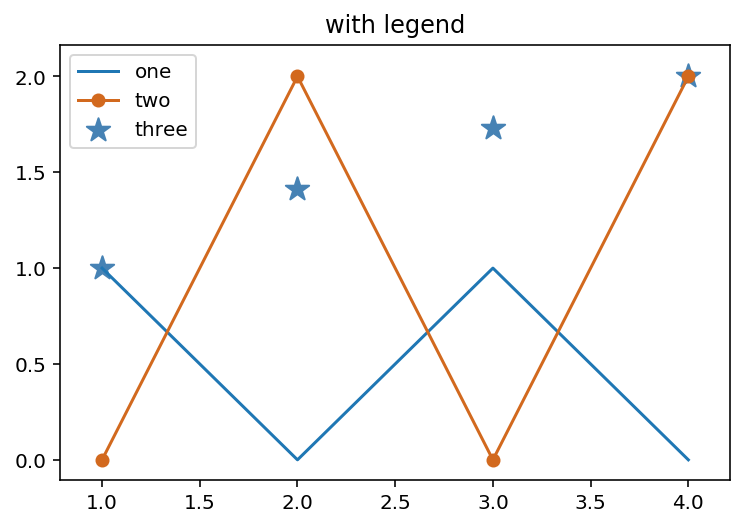

In [58]:
plt.plot(x, y0, label="one")
plt.plot(x, y1, color="chocolate", marker="o", label="two")

# no lines, marker size is 150:
plt.scatter(x, y2, color="steelblue", marker="*", s=150, label="three")

plt.legend()
plt.title("with legend");

After `plt.subplot(m, n, i)` the following plot will paint into cell `i` in a `m` times `n` grid of plots. `m` is the number of rows, `n` is the number of columns and `i` is counted row wise:

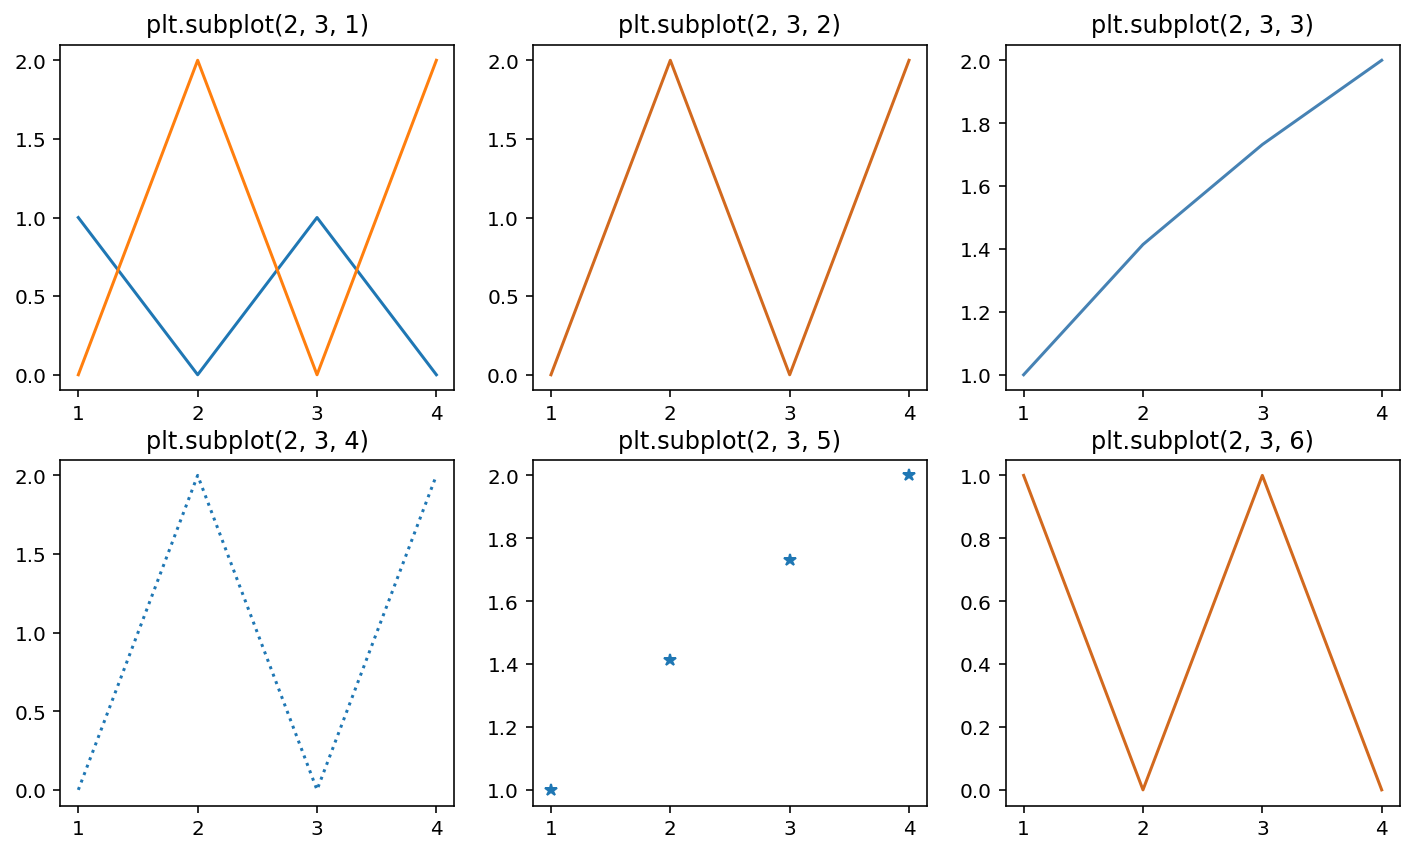

In [59]:
# multiple plots
  
plt.figure(figsize=(12, 7))  # width, height

plt.subplot(2, 3, 1)
plt.plot(x, y0)
plt.plot(x, y1)
plt.title("plt.subplot(2, 3, 1)")

plt.subplot(2, 3, 2)
plt.plot(x, y1, "chocolate")
plt.title("plt.subplot(2, 3, 2)")

plt.subplot(2, 3, 3)
plt.plot(x, y2, "steelblue")
plt.title("plt.subplot(2, 3, 3)")

plt.subplot(2, 3, 4)
plt.plot(x, y1, ":")
plt.title("plt.subplot(2, 3, 4)")

plt.subplot(2, 3, 5)
plt.plot(x, y2, "*")
plt.title("plt.subplot(2, 3, 5)")

plt.subplot(2, 3, 6)
plt.plot(x, y0, "chocolate")
plt.title("plt.subplot(2, 3, 6)");

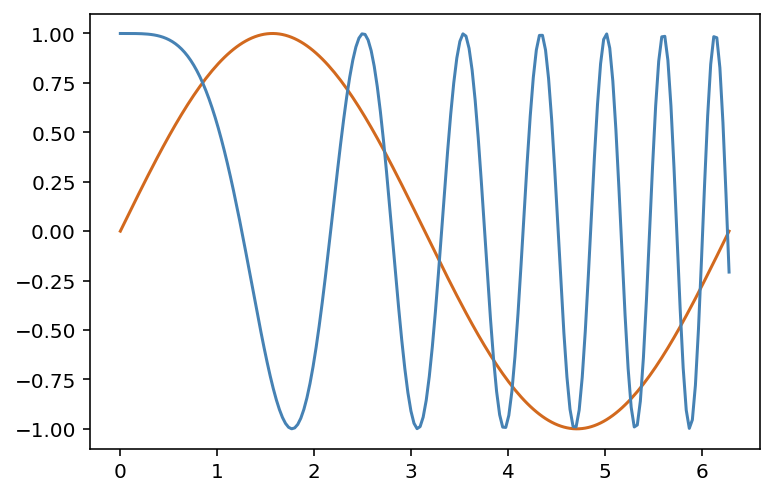

In [60]:
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)
z = np.cos(x ** 2)

plt.plot(x, y, "chocolate")
plt.plot(x, z, "steelblue");

# R within Python

Documentation http://rpy.sourceforge.net/rpy2/doc-2.1/html/introduction.html 

In [11]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector

## R package managment

How to Install R packages using   `rpy2`

In [17]:
packageNames = ('devtools')
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

packnames_to_install = [x for x in packageNames if not rpackages.isinstalled(x)]

if len(packnames_to_install) > 0:
    utils.install_packages(StrVector(packnames_to_install))

R[write to console]: Installing packages into ‘/home/guillotm/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)



Load your favorite R libraries:

In [18]:
ts=robjects.r('ts')
ggplot2=importr('ggplot2')

## Getting R objects

Example in R: `pi`

In [15]:
pi = robjects.r['pi']
pi[0]

3.141592653589793

Load data

Note: the import of `pandas2ri` and the `activate()` function. These are key to transforming certain datatypes from Python to R.

In [6]:
import pandas as pd

from rpy2.robjects import pandas2ri
pandas2ri.activate()

## Evaluating R code
Just paste your R code into the R object. 

The following code creates a `f` function and evaluates it for `3`. 

In [19]:
robjects.r('''
        f <- function(r, verbose=FALSE) {
            if (verbose) {
                cat("I am calling f().\n")
            }
            2 * pi * r
        }
        f(3)
        ''')

array([18.84955592])

Th R function `f` is present in the R Global Environement, and can be accessed with the `__getitem__` mechanism:

In [20]:
r_f = robjects.globalenv['f']
print(r_f.r_repr())

function (r, verbose = FALSE) 
{
    if (verbose) {
        cat("I am calling f().\n")
    }
    2 * pi * r
}


The function `r_f` is callable, and can be used like a regular Python function.

In [21]:
res = r_f(3)
res

array([18.84955592])

## Calling R functions

In [22]:
rsum = robjects.r['sum']
rsum(robjects.IntVector([1,2,3]))[0]

6

# Stata within Python

See [Stata to Python Equivalents](http://www.danielmsullivan.com/pages/tutorial_stata_to_python.html)